<a href="https://colab.research.google.com/github/Carvas91/Carlos_Vasconez_portfolio/blob/main/Practice_Exponentially_Weighted_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/weather_Madrid[1].csv')

In [2]:
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [3]:
df.CET = pd.to_datetime(df.CET)

In [4]:
df.head(5)

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CET                          6812 non-null   datetime64[ns]
 1   Max TemperatureC             6810 non-null   float64       
 2   Mean TemperatureC            6809 non-null   float64       
 3   Min TemperatureC             6810 non-null   float64       
 4   Dew PointC                   6810 non-null   float64       
 5   MeanDew PointC               6810 non-null   float64       
 6   Min DewpointC                6810 non-null   float64       
 7   Max Humidity                 6810 non-null   float64       
 8    Mean Humidity               6810 non-null   float64       
 9    Min Humidity                6810 non-null   float64       
 10   Max Sea Level PressurehPa   6812 non-null   int64         
 11   Mean Sea Level PressurehPa  6812 non-null 

In [7]:
mask = (df.CET >= '2015-01-01') & (df.CET <= '2015-12-31')

In [9]:
df_prep = df.loc[mask][["CET", "Mean TemperatureC"]]

df_prep

,CET,Mean TemperatureC
6447,2015-01-01,3.0
6448,2015-01-02,3.0
6449,2015-01-03,4.0
6450,2015-01-04,7.0
6451,2015-01-05,6.0
...,...,...
6807,2015-12-27,7.0
6808,2015-12-28,8.0
6809,2015-12-29,8.0
6810,2015-12-30,8.0


In [11]:
import matplotlib.pyplot as plt
import numpy as np


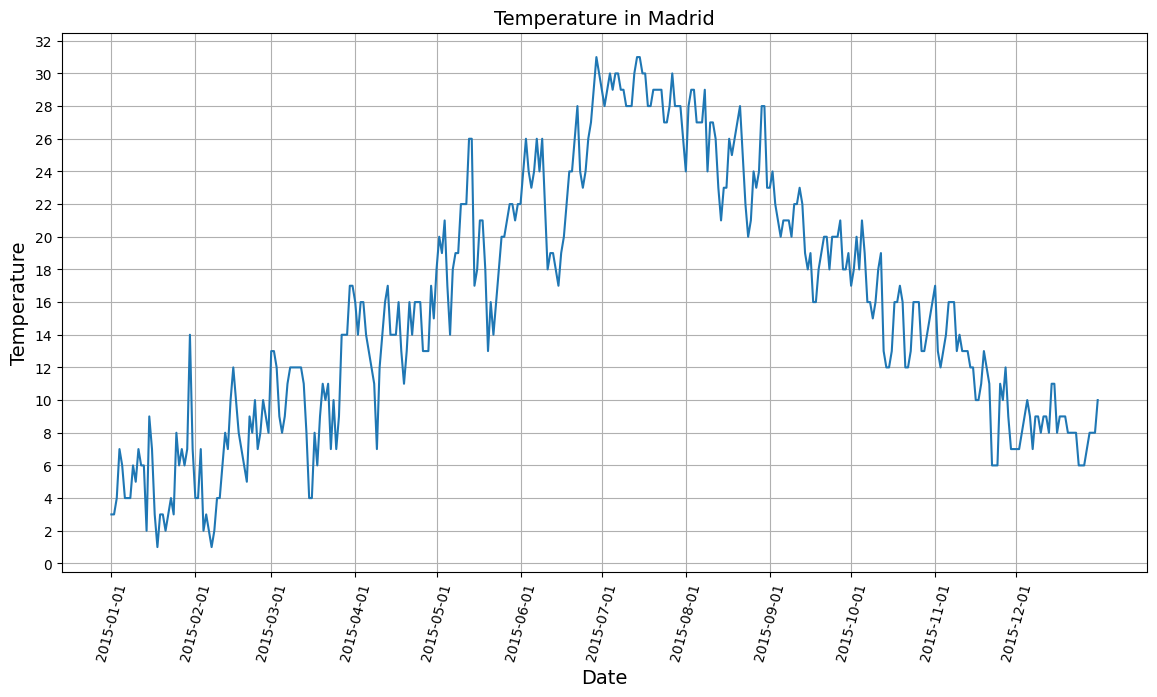

In [21]:
plt.figure(figsize=(14,7))
plt.plot(df_prep.CET, df_prep["Mean TemperatureC"])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature",fontsize=14)
plt.title("Temperature in Madrid", fontsize=14)
plt.xticks(['2015-01','2015-02', '2015-03','2015-04','2015-05','2015-06','2015-07',
            '2015-08','2015-09','2015-10','2015-11','2015-12'],rotation=75)
plt.yticks(np.arange(0,34,2))
plt.grid(True)
plt.show()

In [42]:
def ewma(theta, b=0.9):
    if len(theta) == 1:
        return b*0 + (1-b)*theta[-1]
    return b*ewma(theta[:-1]) + (1-b)*theta[-1]

In [43]:
import numpy as np


In [44]:

def apply_ewma(data, b=0.9):
    v_data = []
    for i in np.arange(1, len(data) + 1):
        print("\rProcesando ejemplo: {0}".format(i), end='')
        v_data.append(ewma(data[:i], b=b))
    return v_data

In [45]:
v_df = apply_ewma(list(df_prep["Mean TemperatureC"]))

Procesando ejemplo: 365

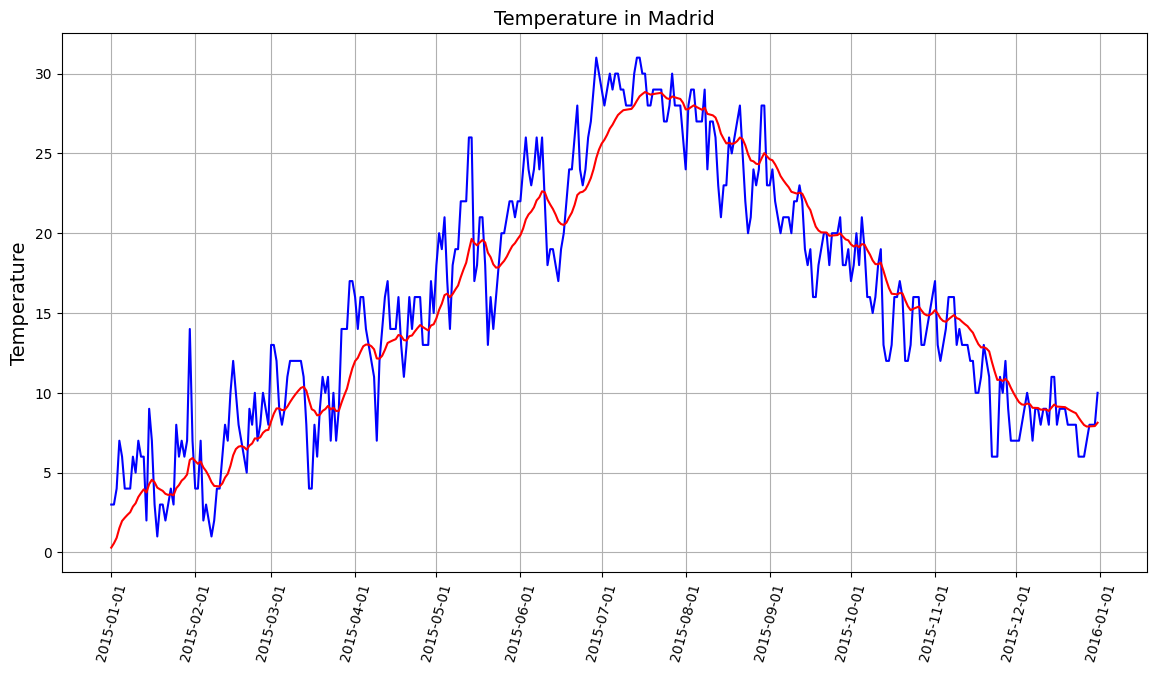

In [50]:
plt.figure(figsize=(14, 7))

plt.plot(df_prep["CET"], df_prep["Mean TemperatureC"], c="b")
plt.plot(df_prep["CET"], v_df, c="r")
plt.xticks(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
            '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
            '2015-11', '2015-12', '2016-01'], rotation=75)
plt.grid()
plt.ylabel("Temperature",fontsize=14)
plt.title("Temperature in Madrid", fontsize=14)
plt.show()